In [2]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Style settings for plots
plt.style.use('ggplot')
sns.set_palette("Set2")


In [7]:
# 📥 Load dataset
# Option 1: Upload the file manually
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('churn_data.csv')  # replace if needed
df.head()

Saving churn_data.csv to churn_data (2).csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Dataset shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling

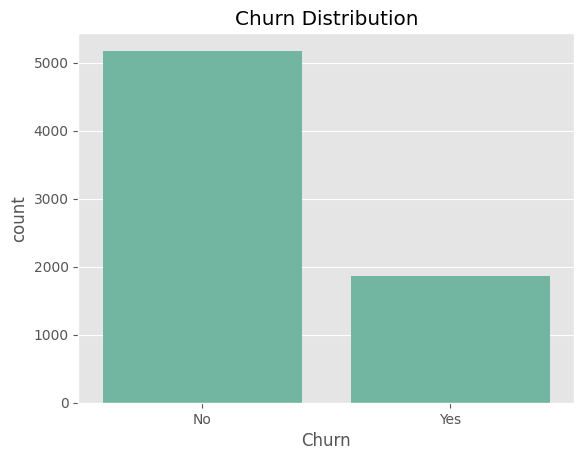

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# 🧭 Quick overview of the dataset
print("Dataset shape:", df.shape)
df.info()

# Check for missing values
df.isnull().sum()

# Check distribution of target variable
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

# Look at numeric distributions
df.describe()


In [9]:
# 🔍 Check for missing values
df.isnull().sum()

# ℹ️ TotalCharges is object type, needs conversion to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 🔍 Check again for nulls after conversion
df.isnull().sum()

# 🧼 Drop rows with missing values (if few, safe to drop)
df = df.dropna()

# 🆔 Drop 'customerID' since it's not a useful feature
df.drop('customerID', axis=1, inplace=True)

# ✅ Confirm dataset is clean
print("New shape after cleaning:", df.shape)
df.info()


New shape after cleaning: (7032, 20)
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMet

/tmp/ipython-input-9-2384147672.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('customerID', axis=1, inplace=True)


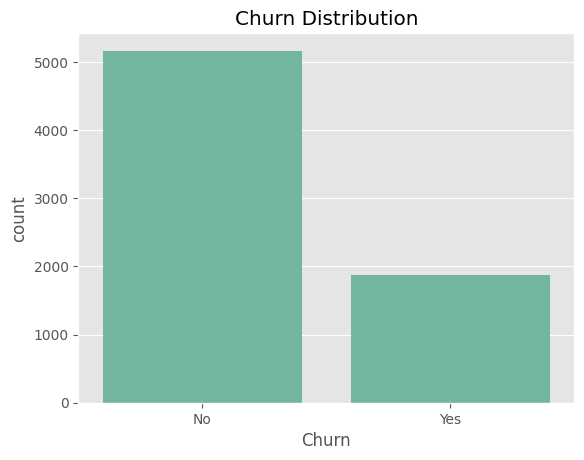

Churn rate:
 Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


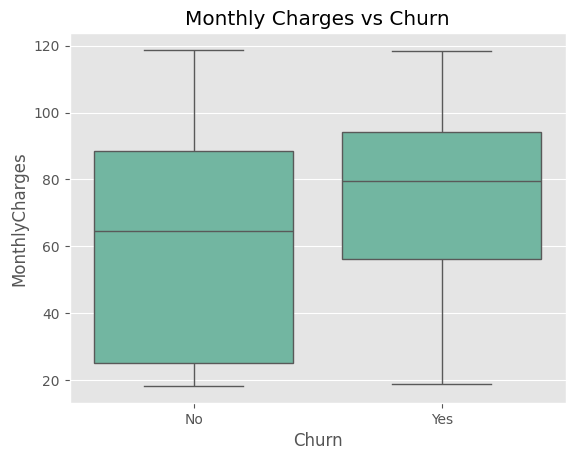

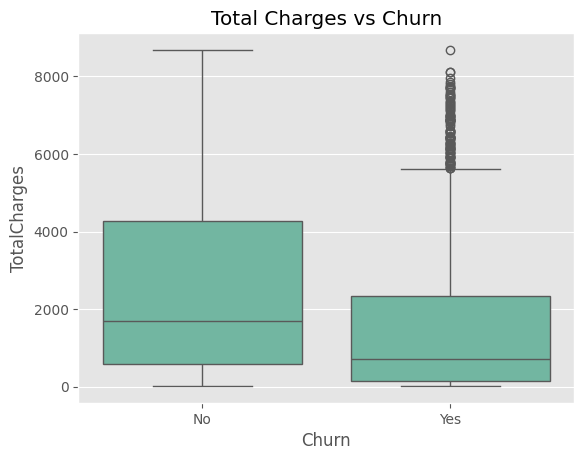

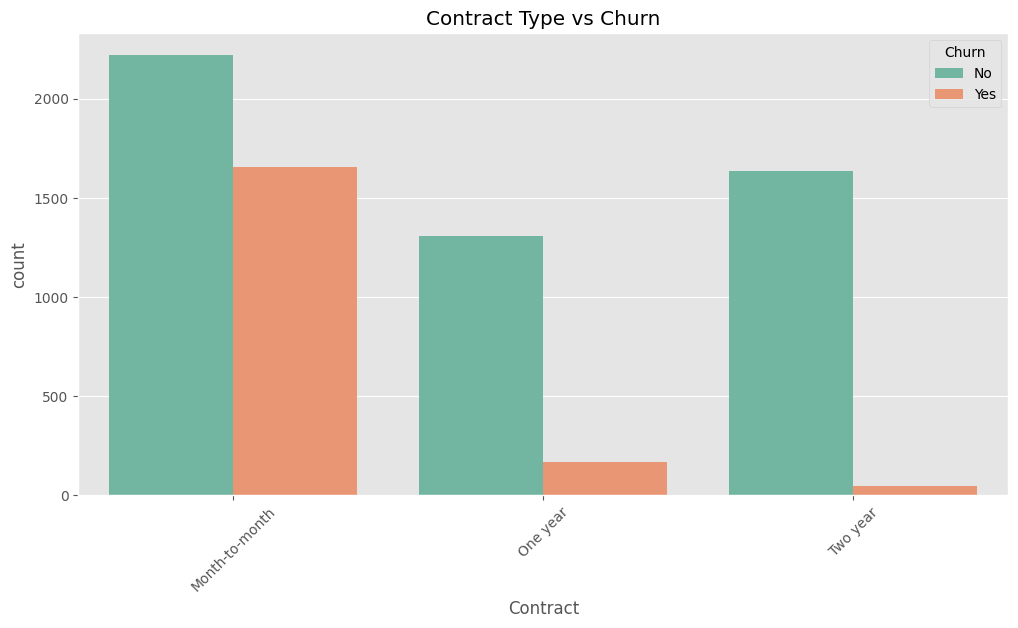

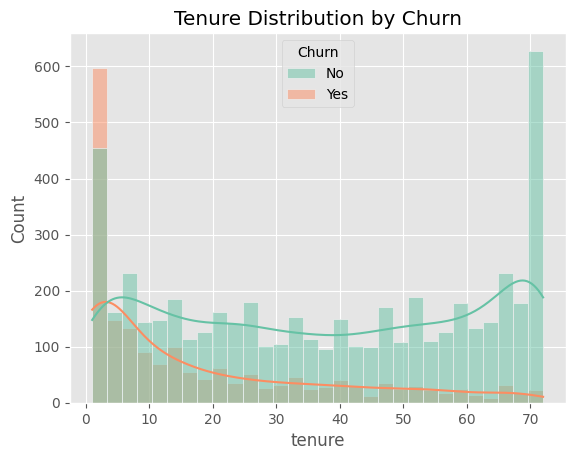

In [10]:
# 📊 Distribution of target variable (Churn)
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# 🧮 Percentage of churned customers
churn_rate = df['Churn'].value_counts(normalize=True)
print("Churn rate:\n", churn_rate)

# 📈 Numerical feature vs churn - Boxplot
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges vs Churn')
plt.show()

# 🔁 Categorical feature vs churn - Countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type vs Churn')
plt.xticks(rotation=45)
plt.show()

# 📊 Tenure distribution (number of months as customer)
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30)
plt.title('Tenure Distribution by Churn')
plt.show()


## 🔍 Exploratory Data Analysis – Insights

### 📊 Contract Type vs Churn
- Customers with **Month-to-month contracts** have the **highest churn rate**.
- Customers with **One or Two-year contracts** are far more likely to stay, indicating that contract length plays a significant role in retention.

### 🕒 Tenure Distribution
- Most churned customers have a **short tenure**, especially between 1–10 months.
- Customers with longer tenure (60+ months) rarely churn, showing **strong loyalty over time**.
- Retention efforts may be most needed within the **first year** of customer lifecycle.


In [11]:
# 🔄 Convert categorical variables to numerical (one-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

# 🧠 Separate features (X) and target (y)
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

# 📊 Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Print shapes to verify
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (5625, 30)
Testing set shape: (1407, 30)


## 🔧 Feature Encoding & Data Splitting

- All categorical variables were transformed using **one-hot encoding**, allowing machine learning models to interpret them numerically.
- The target variable `Churn` was encoded into a binary format (1 for Yes, 0 for No).
- The dataset was split into **80% training** and **20% testing**, ensuring that the distribution of churn remains consistent via `stratify=y`.

This step prepares the dataset for model training and evaluation.


## 🤖 Model Training & Evaluation

We trained two models to predict customer churn:

1. **Logistic Regression**:
   - A linear model useful as a baseline.
   - Interpretable coefficients.
   - May struggle with non-linear relationships.

2. **Random Forest Classifier**:
   - A tree-based ensemble model.
   - Handles non-linear patterns well.
   - Provides feature importance scores.

Each model was evaluated using:
- Confusion matrix
- Precision, Recall, F1-score
- Accuracy on the test set


In [12]:
# 🤖 Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# 📊 Evaluate Logistic Regression
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
[[916 117]
 [160 214]]
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1033
        True       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# 🌲 Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 📊 Evaluate Random Forest
print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
[[917 116]
 [180 194]]
              precision    recall  f1-score   support

       False       0.84      0.89      0.86      1033
        True       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



## 📊 Model Performance Summary

| Model              | Accuracy | Churn Recall | Churn Precision |
|-------------------|----------|---------------|------------------|
| Logistic Regression | 80%      | 57%           | 65%              |
| Random Forest       | 79%      | 52%           | 63%              |

- Both models perform similarly, with **Logistic Regression slightly outperforming** in recall and F1-score.
- However, **Random Forest** will help us analyze feature importance and gain interpretability.
- Future improvements could include:
  - Feature scaling
  - Hyperparameter tuning
  - Ensemble methods or boosting


/tmp/ipython-input-14-1924986376.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_features, palette='viridis')


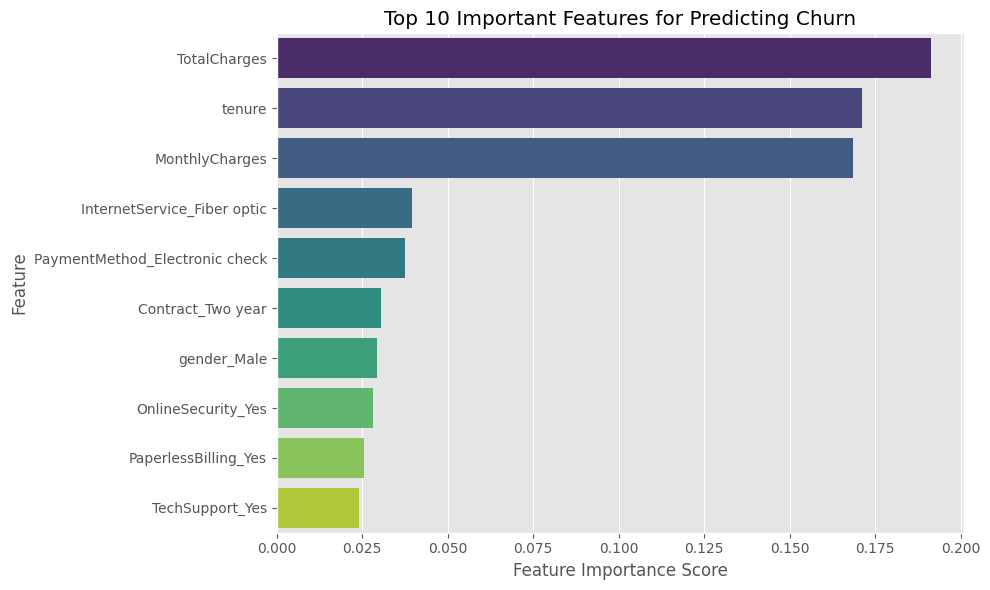

In [14]:
# 🔍 Get feature importances from Random Forest
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feature_names = X.columns

# 🔝 Get top 10 most important features
indices = np.argsort(importances)[::-1][:10]
top_features = feature_names[indices]
top_importances = importances[indices]

# 📊 Plot top 10 features
plt.figure(figsize=(10,6))
sns.barplot(x=top_importances, y=top_features, palette='viridis')
plt.title("Top 10 Important Features for Predicting Churn")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## 🔍 Feature Importance Analysis

Using the trained Random Forest model, we identified the top 10 most important features that contribute to predicting customer churn.

### Key Influential Features:
- **Tenure**: Shorter customer tenure strongly correlates with churn.
- **MonthlyCharges**: Higher charges are linked to increased churn.
- **Contract_Month-to-month**: Customers without long-term contracts are more likely to leave.
- **OnlineSecurity_No** & **TechSupport_No**: Lack of digital service support is associated with higher churn risk.

### Business Recommendations:
- Offer incentives for customers with high monthly charges and low tenure.
- Promote annual contract upgrades to Month-to-month users.
- Encourage adoption of online security and tech support services.
